In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df_08 = pd.read_excel('all_alpha_08.xls')
df_18 = pd.read_excel('all_alpha_18.xlsx')

In [88]:
# view dimensions of dataset
df_08.shape

(2404, 18)

In [89]:
# view dimensions of dataset
df_18.shape

(2138, 18)

In [90]:
# view 2008 dataset
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [91]:
# view 2018 dataset
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309


In [92]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [93]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


In [94]:
# rename Sales Area to Cert Region
df_08=df_08.rename(columns = {'Sales Area':'Cert Region'})

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [95]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [96]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


In [97]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [98]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [99]:
# filter datasets for rows following California standards
df_08 = df_08[df_08['cert_region'] == 'CA']
df_18 = df_18[df_18['cert_region'] == 'CA']

In [100]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [101]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [102]:
# drop certification region columns form both datasets
del df_08['cert_region']
del df_18['cert_region']

In [103]:
df_08.shape

(1084, 13)

In [104]:
df_18.shape

(1058, 13)

In [105]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [106]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                   0
displ                   3
cyl                     3
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [107]:
# drop rows with any null values in both datasets
df_08 = df_08.dropna(axis=0, how='any')
df_18 = df_18.dropna(axis=0, how='any')

In [108]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [109]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

In [110]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

23
5


In [111]:
# drop duplicates in both datasets
df_08 = df_08.drop_duplicates()
df_18 = df_18.drop_duplicates()

In [112]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

0
0


In [113]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)', '(16 cyl)',
       '(5 cyl)', '(2 cyl)'], dtype=object)

In [114]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [115]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [116]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [117]:
# hybrids in 2018
#2008 has one, 2018 has lots of hybrids
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
44,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
160,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
212,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
214,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
242,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
315,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,3,23/55,25/57,24/56,8,Yes
488,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
500,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
502,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
504,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No


In [118]:
# create two copies of the 2008 hybrids dataframe 
#one for first ie Gasoline other for second ie Electricity Gasoline/Electricity
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [119]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [120]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [121]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [122]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [123]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [124]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [125]:
df_08.shape

(987, 13)

In [126]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [127]:
df2.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
44,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
160,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
212,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
214,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
242,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes


In [128]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [129]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index= True)

In [130]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [131]:
df_18.shape

(1106, 13)

In [132]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

In [133]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [134]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

In [135]:
df_18.shape

(1106, 13)

In [136]:
df_08.shape

(987, 13)

In [137]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

In [138]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)
df_18['greenhouse_gas_score'] = df_18['greenhouse_gas_score'].astype(int)

In [139]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [140]:
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

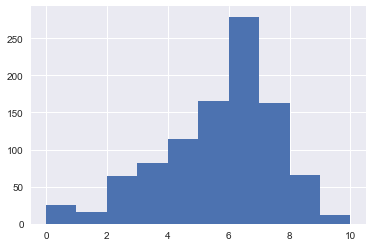

In [142]:
plt.hist(df_08['greenhouse_gas_score'])
plt.show()

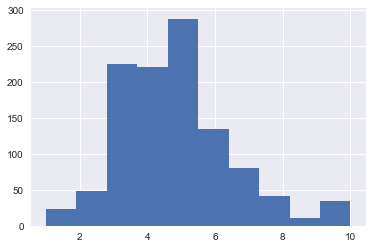

In [143]:
plt.hist(df_18['greenhouse_gas_score'])
plt.show()

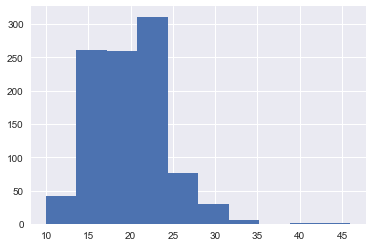

In [144]:
plt.hist(df_08['cmb_mpg'])
plt.show()

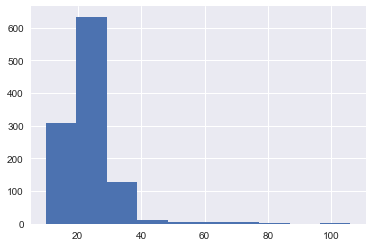

In [145]:
plt.hist(df_18['cmb_mpg'])
plt.show()

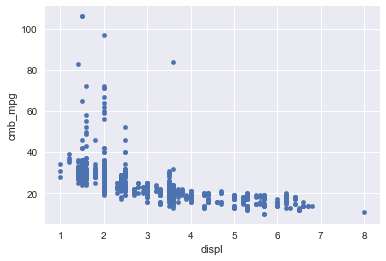

In [151]:
df_18.plot(x='displ', y='cmb_mpg', kind='scatter')

In [152]:
df_08[df_08['fuel'] == 'Gasoline'].count()

model                   984
displ                   984
cyl                     984
trans                   984
drive                   984
fuel                    984
veh_class               984
air_pollution_score     984
city_mpg                984
hwy_mpg                 984
cmb_mpg                 984
greenhouse_gas_score    984
smartway                984
dtype: int64

In [153]:
df_08[df_08['fuel'] != 'Gasoline'].count()

model                   3
displ                   3
cyl                     3
trans                   3
drive                   3
fuel                    3
veh_class               3
air_pollution_score     3
city_mpg                3
hwy_mpg                 3
cmb_mpg                 3
greenhouse_gas_score    3
smartway                3
dtype: int64

In [154]:
df_18[df_18['fuel'] == 'Gasoline'].count()

model                   987
displ                   987
cyl                     987
trans                   987
drive                   987
fuel                    987
veh_class               987
air_pollution_score     987
city_mpg                987
hwy_mpg                 987
cmb_mpg                 987
greenhouse_gas_score    987
smartway                987
dtype: int64

In [155]:
df_18[df_18['fuel'] != 'Gasoline'].count()

model                   119
displ                   119
cyl                     119
trans                   119
drive                   119
fuel                    119
veh_class               119
air_pollution_score     119
city_mpg                119
hwy_mpg                 119
cmb_mpg                 119
greenhouse_gas_score    119
smartway                119
dtype: int64

In [157]:
#How much has fuel economy changed in the past 10 years?
df_18['cmb_mpg'].mean() - df_08['cmb_mpg'].mean()

4.32658099598579

In [158]:
#Qualities of smartway vehicles in 2008
df_08[df_08['smartway'] == 'yes'].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [159]:
#Qualities of non-smartway vehicles in 2008
df_08[df_08['smartway'] == 'no'].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
std,1.203933,1.882335,0.551479,2.564736,3.366852,2.766868,1.629634
min,1.300000,2.000000,4.000000,8.000000,13.000000,10.000000,0.000000
25%,3.200000,6.000000,6.000000,13.000000,19.000000,15.000000,3.000000
50%,3.800000,6.000000,6.000000,15.000000,21.000000,18.000000,5.000000
75%,4.900000,8.000000,7.000000,17.000000,24.000000,19.000000,5.000000
max,8.400000,16.000000,9.500000,21.000000,28.000000,23.000000,7.000000


In [164]:
#Qualities of elite smartway vehicles 2018
df_18[df_18['smartway'] == 'Elite'].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.0
mean,1.966667,4.148148,7.0,55.407407,54.148148,54.518519,10.0
std,0.555393,0.533761,0.0,23.739385,19.728355,21.671268,0.0
min,1.400000,4.000000,7.0,26.000000,28.000000,26.000000,10.0
25%,1.600000,4.000000,7.0,38.500000,40.000000,39.000000,10.0
50%,2.000000,4.000000,7.0,52.000000,52.000000,52.000000,10.0
75%,2.000000,4.000000,7.0,68.000000,65.500000,69.000000,10.0
max,3.600000,6.000000,7.0,113.000000,99.000000,106.000000,10.0


In [165]:
#Qualities of smartway vehicles in 2018
df_18[df_18['smartway'] == 'Yes'].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,1.752985,3.947761,4.820896,31.335821,39.052239,34.283582,7.582090
std,0.431589,0.430373,1.793265,9.798683,8.114145,8.818651,0.797539
min,1.000000,3.000000,3.000000,23.000000,25.000000,24.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,29.000000,38.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.000000,40.000000,34.000000,8.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [167]:
#Qualities of non smartway vehicles in 2018
df_18[df_18['smartway'] == 'No'].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,3.274497,5.774603,3.800000,19.126984,26.406349,21.804233,4.201058
std,1.341781,1.860321,1.698454,4.121405,5.077572,4.434407,1.268005
min,1.000000,3.000000,1.000000,9.000000,12.000000,10.000000,1.000000
25%,2.000000,4.000000,3.000000,16.000000,23.000000,19.000000,3.000000
50%,3.000000,6.000000,3.000000,19.000000,26.000000,22.000000,4.000000
75%,3.900000,6.000000,5.000000,22.000000,30.000000,25.000000,5.000000
max,8.000000,16.000000,7.000000,59.000000,61.000000,60.000000,10.000000


In [169]:
#What makes up q vehicles of 30+ combined mpg?
df_18[df_18['cmb_mpg'] > 30].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.767606,3.971831,4.929577,36.964789,43.295775,39.323944,7.936620
std,0.422178,0.393991,1.959331,16.567683,12.433533,14.551230,1.192261
min,1.000000,3.000000,1.000000,26.000000,30.000000,31.000000,6.000000
25%,1.500000,4.000000,3.000000,28.000000,37.000000,32.000000,7.000000
50%,1.600000,4.000000,5.000000,30.000000,39.000000,34.000000,8.000000
75%,2.000000,4.000000,7.000000,34.750000,42.000000,37.000000,8.750000
max,3.600000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [170]:
# rename 2008 columns
df_08.columns =  df_08.columns.map(lambda x: x[:10]+ '_2008')

In [171]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [173]:
# merge datasets
df_combined = pd.merge(df_08, df_18, how='inner', left_on='model_2008', right_on='model')

In [174]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No
4,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


In [175]:
df_combined.to_csv('combined_dataset.csv', index=False)

In [176]:
df_combined.describe()

,displ_2008,cyl_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,3.721506,6.031799,6.702510,16.844351,23.312134,19.180753,4.933054,3.283180,5.591632,4.238494,20.151464,27.369038,22.861088,4.558996
std,1.301293,1.527194,0.938874,3.736623,4.864201,4.148919,1.812539,1.389369,1.623920,1.579026,5.432977,6.305342,5.677613,1.588957
min,1.500000,4.000000,4.000000,11.000000,14.000000,12.000000,0.000000,1.000000,3.000000,1.000000,11.000000,15.000000,13.000000,1.000000
25%,2.500000,4.000000,6.000000,14.000000,19.000000,15.000000,4.000000,2.000000,4.000000,3.000000,16.000000,22.000000,19.000000,3.000000
50%,3.600000,6.000000,7.000000,16.000000,23.000000,19.000000,5.000000,3.300000,6.000000,3.000000,19.000000,26.000000,22.000000,4.000000
75%,4.600000,8.000000,7.000000,19.000000,26.500000,22.000000,6.000000,4.300000,6.000000,5.000000,23.000000,32.000000,26.000000,5.000000
max,7.000000,12.000000,9.500000,29.000000,37.000000,32.000000,9.000000,6.700000,12.000000,7.000000,63.000000,61.000000,62.000000,10.000000
